In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [47]:
# Read in the data
data = []
fin = open("Data/Galaxy Data/SPARC_Lelli2016c.mrt")
lines = fin.read().split("\n")[98:-1]
for line in lines:
    data.append(line.strip().replace(",", ";").split())
print(data)

[['CamB', '10', '3.36', '0.26', '2', '65.0', '5.0', '0.075', '0.003', '1.21', '7.89', '0.47', '66.20', '0.012', '1.21', '0.0', '0.0', '2', 'Bm03'], ['D512-2', '10', '15.20', '4.56', '1', '56.0', '10.0', '0.325', '0.022', '2.37', '9.22', '1.24', '93.94', '0.081', '0.00', '0.0', '0.0', '2', 'Tr09'], ['D564-8', '10', '8.79', '0.28', '2', '63.0', '7.0', '0.033', '0.004', '0.72', '10.11', '0.61', '21.13', '0.029', '0.00', '0.0', '0.0', '2', 'Tr09'], ['D631-7', '10', '7.72', '0.18', '2', '59.0', '3.0', '0.196', '0.009', '1.22', '20.93', '0.70', '115.04', '0.290', '0.00', '57.7', '2.7', '1', 'Tr09;dB01'], ['DDO064', '10', '6.80', '2.04', '1', '60.0', '5.0', '0.157', '0.007', '1.20', '17.41', '0.69', '151.65', '0.211', '3.49', '46.1', '3.9', '1', 'dB02;Sw02'], ['DDO154', '10', '4.04', '0.20', '2', '64.0', '3.0', '0.053', '0.002', '0.65', '19.99', '0.37', '71.26', '0.275', '4.96', '47.0', '1.0', '2', 'Be91;CB89'], ['DDO161', '10', '7.50', '2.25', '1', '70.0', '10.0', '0.548', '0.015', '2.04', '

In [48]:
fout = open("Data/Galaxy Data/SPARC_Lelli2016c.csv", "w")
headers = ",".join(open("Data/Galaxy Data/SPARC_Lelli2016c-headers.txt").read().split("\n"))
fout.write(headers + "\n")
for line in data:
    fout.write(",".join(line))
    if line != data[-1]:
        fout.write("\n")
fout.close()

In [49]:
df = pd.read_csv("Data/Galaxy Data/SPARC_Lelli2016c.csv")
df

,Galaxy,T,D,e_D,f_D,Inc,e_Inc,L[3.6],e_L[3.6],Reff,SBeff,Rdisk,SBdisk,MHI,RHI,Vflat,e_Vflat,Q,Ref.
0,CamB,10,3.36,0.26,2,65.0,5.0,0.075,0.003,1.21,7.89,0.47,66.20,0.012,1.21,0.0,0.0,2,Bm03
1,D512-2,10,15.20,4.56,1,56.0,10.0,0.325,0.022,2.37,9.22,1.24,93.94,0.081,0.00,0.0,0.0,2,Tr09
2,D564-8,10,8.79,0.28,2,63.0,7.0,0.033,0.004,0.72,10.11,0.61,21.13,0.029,0.00,0.0,0.0,2,Tr09
3,D631-7,10,7.72,0.18,2,59.0,3.0,0.196,0.009,1.22,20.93,0.70,115.04,0.290,0.00,57.7,2.7,1,Tr09;dB01
4,DDO064,10,6.80,2.04,1,60.0,5.0,0.157,0.007,1.20,17.41,0.69,151.65,0.211,3.49,46.1,3.9,1,dB02;Sw02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,UGC12632,9,9.77,2.93,1,46.0,3.0,1.301,0.030,3.94,13.09,2.42,66.81,1.744,12.60,71.7,2.8,1,Sw09;Sw02
171,UGC12732,9,13.20,4.00,1,39.0,6.0,1.667,0.048,3.12,26.84,1.98,120.46,3.660,17.41,0.0,0.0,1,Sw09;Sw02
172,UGCA281,11,5.68,0.28,2,67.0,3.0,0.194,0.007,1.57,12.50,1.72,12.05,0.062,1.83,0.0,0.0,3,Le14
173,UGCA442,9,4.35,0.22,2,64.0,7.0,0.140,0.005,1.71,7.60,1.18,116.10,0.263,4.37,56.4,2.1,1,Co00


In [50]:
df['LumCalc'] = df['Reff'] ** 2 * 2 * np.pi * df['SBeff'] / 10 ** 3

Formula: $L=\frac{\pi R_{eff}^2S}{500}$

In [51]:
df['LumPercentError'] = np.abs(df['L[3.6]'] - df['LumCalc']) / df['L[3.6]']

In [52]:
q1_avg = np.mean(df[df['Q'] == 1]['LumPercentError'])
q2_avg = np.mean(df[df['Q'] == 2]['LumPercentError'])
q3_avg = np.mean(df[df['Q'] == 3]['LumPercentError'])
print(q1_avg, q2_avg, q3_avg)

0.007273708982538694 0.021596520898277145 0.007096962276342434


In [53]:
df

,Galaxy,T,D,e_D,f_D,Inc,e_Inc,L[3.6],e_L[3.6],Reff,...,Rdisk,SBdisk,MHI,RHI,Vflat,e_Vflat,Q,Ref.,LumCalc,LumPercentError
0,CamB,10,3.36,0.26,2,65.0,5.0,0.075,0.003,1.21,...,0.47,66.20,0.012,1.21,0.0,0.0,2,Bm03,0.072582,0.032243
1,D512-2,10,15.20,4.56,1,56.0,10.0,0.325,0.022,2.37,...,1.24,93.94,0.081,0.00,0.0,0.0,2,Tr09,0.325392,0.001208
2,D564-8,10,8.79,0.28,2,63.0,7.0,0.033,0.004,0.72,...,0.61,21.13,0.029,0.00,0.0,0.0,2,Tr09,0.032930,0.002111
3,D631-7,10,7.72,0.18,2,59.0,3.0,0.196,0.009,1.22,...,0.70,115.04,0.290,0.00,57.7,2.7,1,Tr09;dB01,0.195735,0.001351
4,DDO064,10,6.80,2.04,1,60.0,5.0,0.157,0.007,1.20,...,0.69,151.65,0.211,3.49,46.1,3.9,1,dB02;Sw02,0.157522,0.003325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,UGC12632,9,9.77,2.93,1,46.0,3.0,1.301,0.030,3.94,...,2.42,66.81,1.744,12.60,71.7,2.8,1,Sw09;Sw02,1.276768,0.018626
171,UGC12732,9,13.20,4.00,1,39.0,6.0,1.667,0.048,3.12,...,1.98,120.46,3.660,17.41,0.0,0.0,1,Sw09;Sw02,1.641616,0.015227
172,UGCA281,11,5.68,0.28,2,67.0,3.0,0.194,0.007,1.57,...,1.72,12.05,0.062,1.83,0.0,0.0,3,Le14,0.193593,0.002099
173,UGCA442,9,4.35,0.22,2,64.0,7.0,0.140,0.005,1.71,...,1.18,116.10,0.263,4.37,56.4,2.1,1,Co00,0.139632,0.002627


(array([6., 1., 0., 0., 1., 2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([0.00133944, 0.00272325, 0.00410706, 0.00549086, 0.00687467,
        0.00825848, 0.00964229, 0.01102609, 0.0124099 , 0.01379371,
        0.01517751, 0.01656132, 0.01794513, 0.01932894, 0.02071274,
        0.02209655, 0.02348036, 0.02486416, 0.02624797, 0.02763178,
        0.02901559]),
 <BarContainer object of 20 artists>)

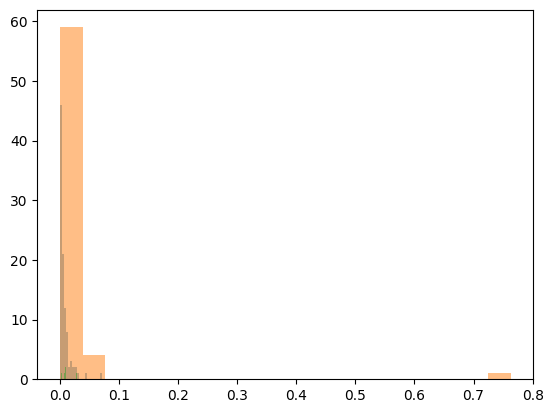

In [56]:
# plot the error distribution as a histogram for each quality flag
plt.hist(df[df['Q'] == 1]['LumPercentError'], bins=20, alpha=0.5, label='Q=1')
plt.hist(df[df['Q'] == 2]['LumPercentError'], bins=20, alpha=0.5, label='Q=2')
plt.hist(df[df['Q'] == 3]['LumPercentError'], bins=20, alpha=0.5, label='Q=3')